In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

In [14]:
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
data = np.c_[iris.data,iris.target]
columns = np.append(iris.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)
print(df)
print(iris.feature_names)

(150, 4)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0   

In [15]:
df[iris.feature_names].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

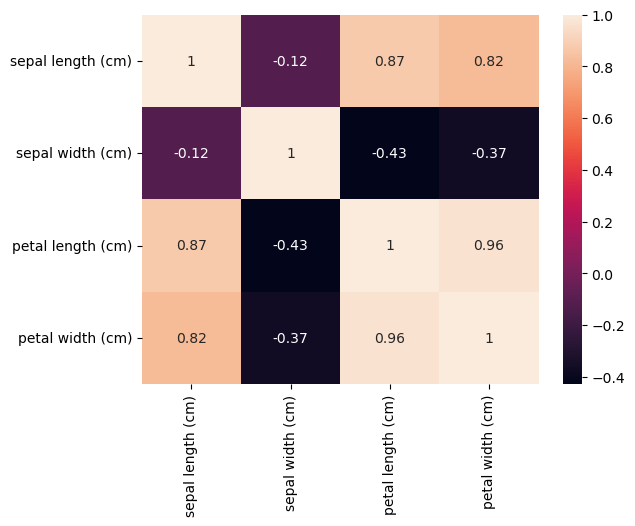

In [16]:
sns.heatmap(df[iris.feature_names].corr(),annot=True)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 4)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Text(0, 0.5, 'Accuracy on test data')

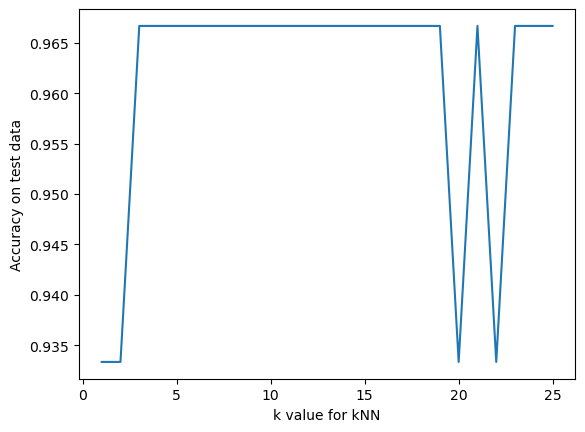

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

test_k = range(1,26)
scores = []
for k in test_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(test_k,scores)
plt.xlabel('k value for kNN')
plt.ylabel('Accuracy on test data')

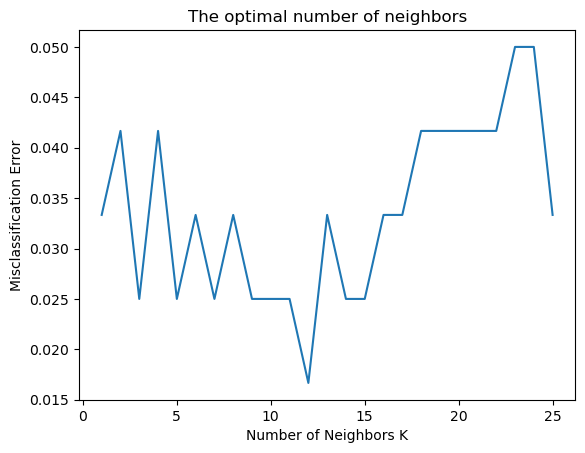

In [24]:
cv_scores = []
for k in test_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(score.mean())
    
MSE = [1 - x for x in cv_scores]
plt.title('The optimal number of neighbors')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.plot(test_k, MSE)

plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)
metrics.accuracy_score(y_test,y_pred)

0.9666666666666667